### numba
- $ pip install numba
- numpy, 내장 함수에 사용 가능
- list comprehesion에 사용하면 더 느려진다. numpy array 써야댐
- 컴파일을 하는 것이 중요

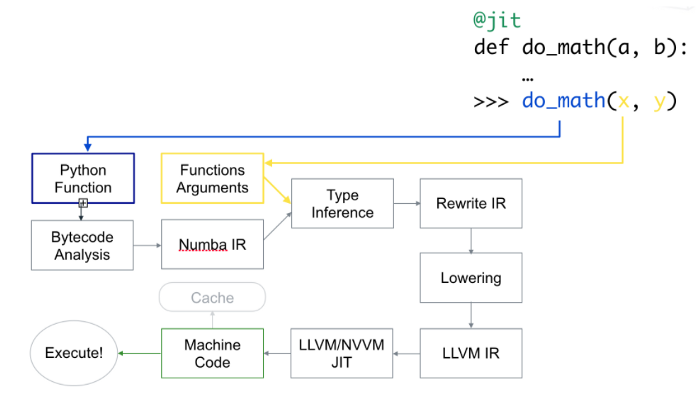

In [3]:
from time import perf_counter
from numba import jit

def pure_sum(n):
    result = 0
    for i in range(0, n+1):
        result += i
    return result

@jit(nopython=True, cache=True)
def numba_sum(n):
    result = 0
    for i in range(0, n+1):
        result += i
    return result

start = perf_counter()
pure_sum(100000000)
print(f'pure python : {perf_counter() - start}')

numba_sum(1) # compile

start = perf_counter()
numba_sum(100000000)
print(f'numba : {perf_counter() - start}')

pure python : 3.928917031735182
numba : 5.109421908855438e-05


In [4]:
import random

def avg_python(n):
    s = 0
    for i in range(n):
        s += random.random()
    return s/n
n = 1000000
%time avg_python(n)

CPU times: user 72.8 ms, sys: 3.32 ms, total: 76.1 ms
Wall time: 75.5 ms


0.5004555761544126

In [5]:
%timeit avg_python(n)

80.3 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
import numpy as np

def avg_np(n):
    s = np.random.random(n)
    return s.mean()

%time avg_np(n)

CPU times: user 3.08 ms, sys: 9.22 ms, total: 12.3 ms
Wall time: 20.9 ms


0.5000439616029827

In [7]:
%timeit avg_np(n)

4.67 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
import numba

avg_nb = numba.jit(avg_python)
%time avg_nb(n) # 1번째는 빠르지 않음

CPU times: user 62.1 ms, sys: 19.4 ms, total: 81.4 ms
Wall time: 185 ms


0.5003746026255218

In [9]:
%time avg_np(n) # 2번째부터 캐싱이 되어 빠름

CPU times: user 6.53 ms, sys: 0 ns, total: 6.53 ms
Wall time: 6.04 ms


0.49984492937291647

In [10]:
avg_nb_np = numba.jit(avg_np)
%time avg_nb_np(n)

CPU times: user 205 ms, sys: 4.06 ms, total: 209 ms
Wall time: 222 ms


0.49956926433209514

In [11]:
%time avg_nb_np(n) # numpy + numba 약간 늦어지는 경향

CPU times: user 1.43 ms, sys: 2.61 ms, total: 4.04 ms
Wall time: 4.05 ms


0.5003693882116556

paralle=True가 numba jitted 함수에 전달될 때, 항상 모든 cpu 코어를 사용한다는 것을 의미하는 것은 X <br>
강제 멀티 스레딩 관련 <br>
https://numba.pydata.org/numba-doc/dev/user/examples.html#multi-threading